  **2025 Monaco Grand Prix**        

The 2025 Formula 1 Monaco Grand Prix, held from May 23 to May 25 at the iconic Circuit de Monaco, was a landmark event in the season. Lando Norris achieved his first-ever victory in Monaco, leading from pole position and holding off Charles Leclerc to secure the win.

**Race Highlights**
Winner: Lando Norris (McLaren Mercedes) clinched victory with a time of 1:40:33.843.

Podium Finishers:

2nd: Charles Leclerc (Ferrari), finishing +3.131s behind.

3rd: Oscar Piastri (McLaren Mercedes), trailing by +3.658s.

Top 10 Results:

1.Lando Norris (McLaren Mercedes)

2.Charles Leclerc (Ferrari)

3.Oscar Piastri (McLaren Mercedes)

4.Max Verstappen (Red Bull Racing Honda RBPT)

5.Lewis Hamilton (Ferrari)

6.Isack Hadjar (Racing Bulls Honda RBPT)

7.Esteban Ocon (Haas Ferrari)

8.Liam Lawson (Racing Bulls Honda RBPT)

9.Alexander Albon (Williams Mercedes)

10.Carlos Sainz (Williams Mercedes)

**1.Import Libraries**
Imported necessary libraries for data analysis, visualization, and machine learning.

**2. Load Data**
loaded race and sprint qualifying CSV files into DataFrames for analysis.

**3. Initial Exploration**
Displayed the top rows and structure of the datasets to understand their content.

**4. Clean Data**
Handled missing values and removed rows with critical nulls like missing driver names.

**5. Driver Leaderboard**
Calculated and visualized the top 10 drivers based on total points.

**6. Team Performance**
Grouped and visualized total team points to identify top-performing constructors.

**7. Position Gain/Loss Analysis**
Computed average position changes to identify drivers who gain or lose most places in races.

**8. Fastest Lap Analysis**
Counted and visualized which drivers set the fastest laps most often.

**9. Re-import for ML Setup**
Reloaded data and imported libraries to prepare for machine learning tasks.

**10. Encode Categorical Feature**s
Used label encoding to convert driver, team, and track names to numeric form.

**11. Feature Engineering**
Created new features like position change, driver consistency, and gain indicators.

**12. Train-Test Split and Scaling**
Split the data and scaled features for better ML model performance.

**13. Train Random Forest Mode**l
Trained a Random Forest Classifier to predict whether a driver improves race position.

**14. Evaluate the Model**
Evaluated the model using a classification report and confusion matrix.

**15. Interactive Visualization**
Visualized driver performance across tracks using a Plotly line chart.

**16. Feature Importance**
Identified which features most influenced the model’s predictions.

**17. Clustering Drivers**
Clustered drivers based on position change and consistency to find performance patterns.

**18. Save Model**
Saved and reloaded the trained model and scaler using joblib for reuse.

**19. Image Display (Winner Pics)**
 Display images of race results and winners using image URLs and local paths.**

In [1]:
#Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Optional: Set up visualization aesthetics
sns.set(style="whitegrid")

In [5]:
# Load the Data
# Load race results CSV
race_results = pd.read_csv('/content/Formula1_2025Season_SprintQualifyingResults.csv')

# Load sprint qualifying results CSV
sprint_results = pd.read_csv('/content/Formula1_2025Season_RaceResults.csv')

# Show top 5 rows
print(race_results.head())
print(sprint_results.head())

# Summary info
print(race_results.info())
print(sprint_results.info())



   Track  Position  No           Driver                        Team        Q1  \
0  China         1  44   Lewis Hamilton                     Ferrari  1:31.212   
1  China         2   1   Max Verstappen  Red Bull Racing Honda RBPT  1:31.916   
2  China         3  81    Oscar Piastri            McLaren Mercedes  1:31.723   
3  China         4  16  Charles Leclerc                     Ferrari  1:31.518   
4  China         5  63   George Russell                    Mercedes  1:31.952   

         Q2        Q3  Laps  
0  1:31.484  1:30.849    15  
1  1:31.521  1:30.867    12  
2  1:31.362  1:30.929    13  
3  1:31.561  1:31.057    15  
4  1:31.346  1:31.169    18  
       Track Position  No           Driver                        Team  \
0  Australia        1   4     Lando Norris            McLaren Mercedes   
1  Australia        2   1   Max Verstappen  Red Bull Racing Honda RBPT   
2  Australia        3  63   George Russell                    Mercedes   
3  Australia        4  12   Kimi Anto

In [6]:
# Clean the Data
# Check for missing values
print(race_results.isnull().sum())
print(sprint_results.isnull().sum())

# Fill or drop nulls as needed
# Example: drop rows with missing driver names
race_results = race_results.dropna(subset=['Driver'])


Track        0
Position     0
No           0
Driver       0
Team         0
Q1           0
Q2          10
Q3          20
Laps         0
dtype: int64
Track               0
Position            0
No                  0
Driver              0
Team                0
Starting Grid       0
Laps                0
Time/Retired        0
Points              0
Set Fastest Lap     0
Fastest Lap Time    6
dtype: int64


['track', 'position', 'no', 'driver', 'team', 'starting_grid', 'laps', 'time/retired', 'points', 'set_fastest_lap', 'fastest_lap_time']


<ipython-input-20-5245dfff1312>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='points', y='driver', data=driver_points.head(10), palette='viridis')


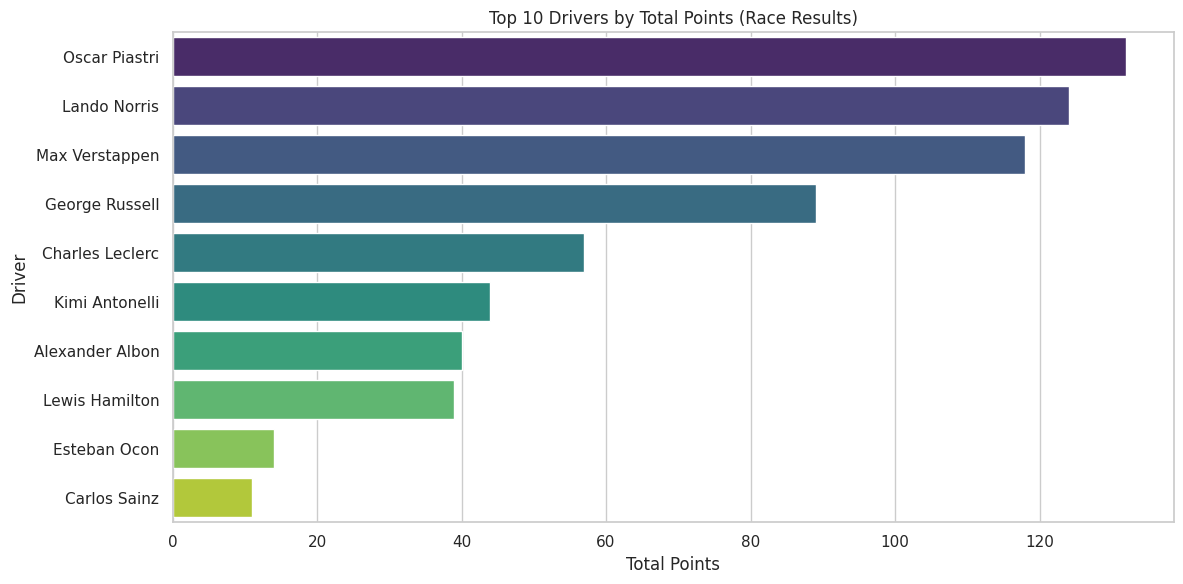

In [20]:
# A clear leaderboard of the top-performing F1 drivers based on total points earned in the 2025 season
import pandas as pd

# Load the race results CSV
race_results = pd.read_csv('/content/Formula1_2025Season_RaceResults.csv')

# Clean column names
race_results.columns = race_results.columns.str.strip().str.lower().str.replace(' ', '_')

# Confirm available columns
print(race_results.columns.tolist())

# Group by driver and sum points
driver_points = race_results.groupby('driver')['points'].sum().sort_values(ascending=False).reset_index()

# Plot the top 10 drivers
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x='points', y='driver', data=driver_points.head(10), palette='viridis')
plt.title('Top 10 Drivers by Total Points (Race Results)')
plt.xlabel('Total Points')
plt.ylabel('Driver')
plt.tight_layout()
plt.show()



**Team Performance Analysis** : Which teams are dominating overall.

<ipython-input-21-906ba1c07f17>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='points', y='team', data=team_points, palette='magma')


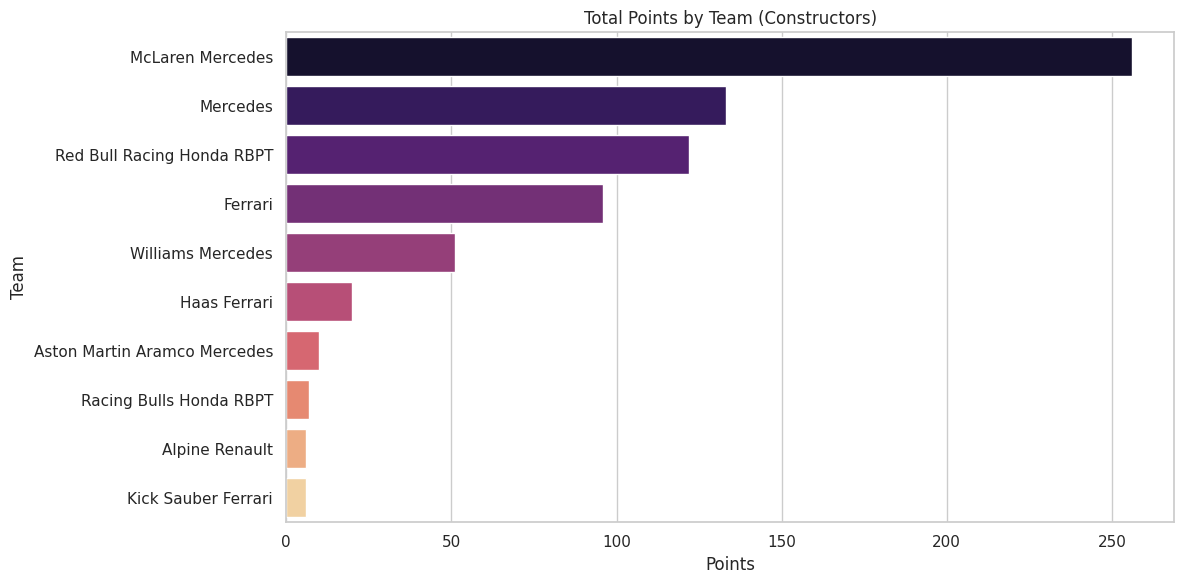

In [21]:
# Group by team and sum points
team_points = race_results.groupby('team')['points'].sum().sort_values(ascending=False).reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='points', y='team', data=team_points, palette='magma')
plt.title('Total Points by Team (Constructors)')
plt.xlabel('Points')
plt.ylabel('Team')
plt.tight_layout()
plt.show()


**Position Gain/Loss Analysis**: which drivers gain or lose the most positions between starting grid and final race position.

<ipython-input-25-fb0961a4b14f>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='position_change', y='driver', data=position_gain.head(10), palette='coolwarm')


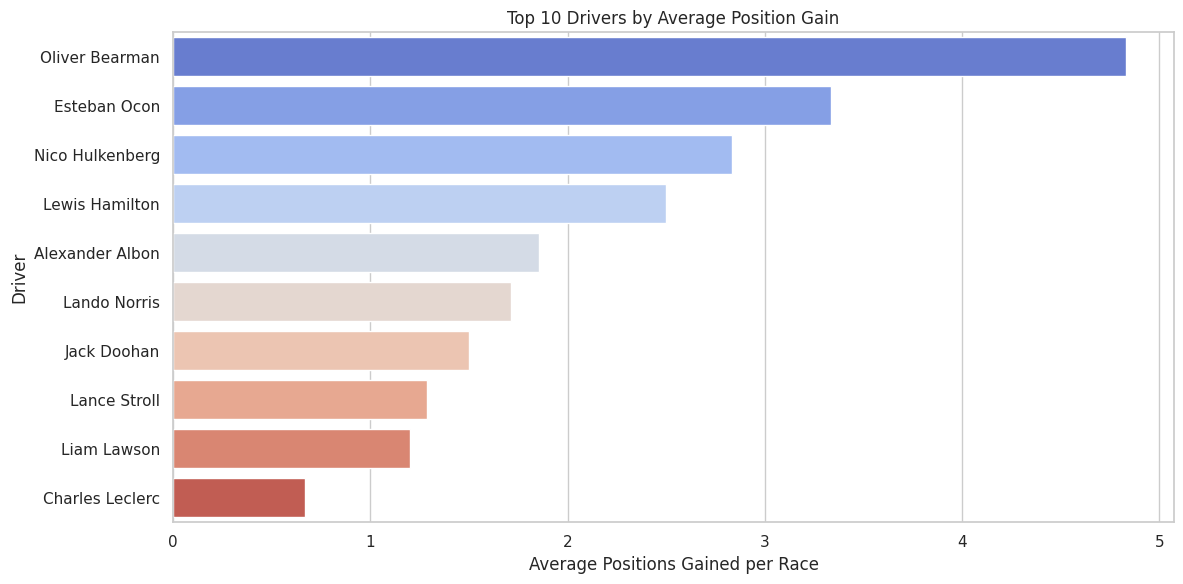

In [25]:
# Convert to numeric (force errors to NaN and then drop or fill them)
race_results['starting_grid'] = pd.to_numeric(race_results['starting_grid'], errors='coerce')
race_results['position'] = pd.to_numeric(race_results['position'], errors='coerce')
# Compute position change
race_results['position_change'] = race_results['starting_grid'] - race_results['position']
# Average position gain/loss by driver
position_gain = race_results.groupby('driver')['position_change'].mean().sort_values(ascending=False).reset_index()

# Plot top 10
plt.figure(figsize=(12, 6))
sns.barplot(x='position_change', y='driver', data=position_gain.head(10), palette='coolwarm')
plt.title('Top 10 Drivers by Average Position Gain')
plt.xlabel('Average Positions Gained per Race')
plt.ylabel('Driver')
plt.tight_layout()
plt.show()


**Fastest Lap Analysis** : Who are the fastest drivers across races?

<ipython-input-26-4dc7e9611ebc>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='fastest_laps', y='driver', data=fastest_lap_counts, palette='plasma')


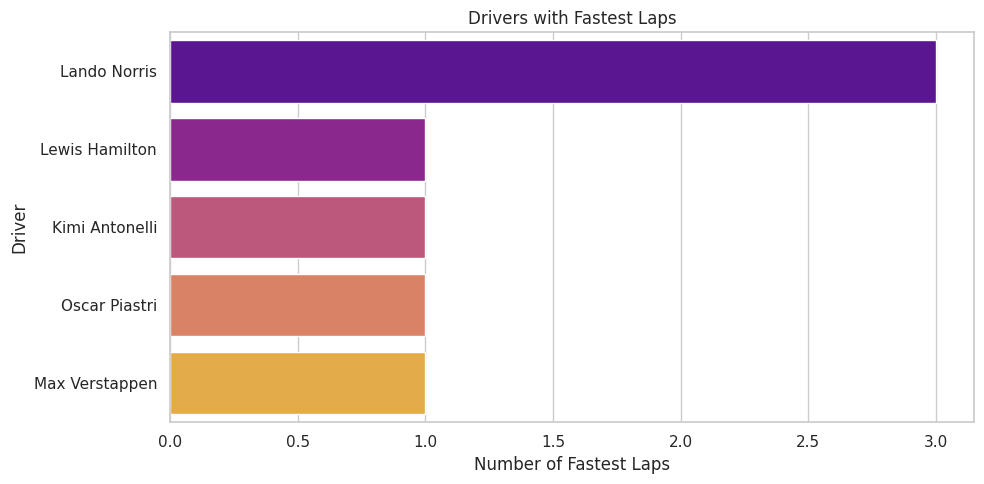

In [26]:
# Filter only laps where Fastest Lap was set
fastest_laps = race_results[race_results['set_fastest_lap'].str.lower() == 'yes']

# Count how many times each driver set the fastest lap
fastest_lap_counts = fastest_laps['driver'].value_counts().reset_index()
fastest_lap_counts.columns = ['driver', 'fastest_laps']

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x='fastest_laps', y='driver', data=fastest_lap_counts, palette='plasma')
plt.title('Drivers with Fastest Laps')
plt.xlabel('Number of Fastest Laps')
plt.ylabel('Driver')
plt.tight_layout()
plt.show()


In [31]:
# Basic Data Handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Interactive Dashboard (optional for deployment)
!pip install streamlit
import streamlit as st


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 52.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 72.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.2 MB/s eta 0:00:00


In [38]:
import pandas as pd

# Load the datasets (use correct paths to uploaded files)
race_df = pd.read_csv('/content/Formula1_2025Season_RaceResults.csv')
sprint_df = pd.read_csv('/content/Formula1_2025Season_SprintQualifyingResults.csv')

# Confirm it's loaded
print("Race Data Preview:")
print(race_df.head())

print("\nSprint Qualifying Data Preview:")
print(sprint_df.head())


Race Data Preview:
       Track Position  No           Driver                        Team  \
0  Australia        1   4     Lando Norris            McLaren Mercedes   
1  Australia        2   1   Max Verstappen  Red Bull Racing Honda RBPT   
2  Australia        3  63   George Russell                    Mercedes   
3  Australia        4  12   Kimi Antonelli                    Mercedes   
4  Australia        5  23  Alexander Albon           Williams Mercedes   

   Starting Grid  Laps Time/Retired  Points Set Fastest Lap Fastest Lap Time  
0              1    57  1:42:06.304      25             Yes         1:22.167  
1              3    57       +0.895      18              No         1:23.081  
2              4    57       +8.481      15              No         1:25.065  
3             16    57      +10.135      12              No         1:24.901  
4              6    57      +12.773      10              No         1:24.597  

Sprint Qualifying Data Preview:
   Track  Position  No       

**Encoding Categorical Features** : text columns like Driver, Team, and Track. Machine learning models require numeric input, so we need to convert them using Label Encoding.

In [49]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in ['Driver', 'Team_race', 'Track']:
    if col in merged_df.columns:
        le = LabelEncoder()
        merged_df[col] = le.fit_transform(merged_df[col])
        label_encoders[col] = le

# Ensure correct column names after merging
merged_df.rename(columns={
    'Position_race': 'Position_race',
    'Position_sprint': 'Position_sprint'
}, inplace=True)

# Convert position columns to numeric (in case they are strings)
merged_df['Position_race'] = pd.to_numeric(merged_df['Position_race'], errors='coerce')
merged_df['Position_sprint'] = pd.to_numeric(merged_df['Position_sprint'], errors='coerce')

# Feature engineering
merged_df['Position_Change'] = merged_df['Position_race'] - merged_df['Position_sprint']
merged_df['IsGain'] = (merged_df['Position_Change'] < 0).astype(int)
merged_df['Driver_Consistency'] = merged_df.groupby('Driver')['Position_race'].transform('std')

# Fill missing consistency values
merged_df['Driver_Consistency'].fillna(merged_df['Driver_Consistency'].median(), inplace=True)
features = ['Position_sprint', 'Position_race', 'Position_Change', 'Driver_Consistency', 'Driver', 'Team_race', 'Track']
X = merged_df[features]
y = merged_df['IsGain']

print(merged_df.columns.tolist())



['Track', 'Position_race', 'No_race', 'Driver', 'Team_race', 'Starting Grid', 'Laps_race', 'Time/Retired', 'Points', 'Set Fastest Lap', 'Fastest Lap Time', 'Position_sprint', 'No_sprint', 'Team_sprint', 'Q1', 'Q2', 'Q3', 'Laps_sprint', 'Position_Change', 'IsGain', 'Driver_Consistency']


<ipython-input-49-e6fde13e6224>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['Driver_Consistency'].fillna(merged_df['Driver_Consistency'].median(), inplace=True)


** Train-Test Split and Scaling** : We scale features for better ML performance.

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Train a Classifier Model** :  Random Forest Classifier to predict if a driver improves position in the race.

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Confusion Matrix:
[[6 0]
 [0 2]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         2

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



**Evaluate the Model** : We check how well the model predicts performance improvement.

In [54]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[6 0]
 [0 2]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         2

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



**Interactive Visualization** : Use Plotly to create an interactive line chart of driver performance.

In [55]:
import plotly.express as px

fig = px.line(merged_df.sort_values('Track'), x='Track', y='Position_race',
              color='Driver', title='Driver Race Positions Over Tracks')
fig.show()


**Feature Importance Analysis** : See which features are influencing the model most:

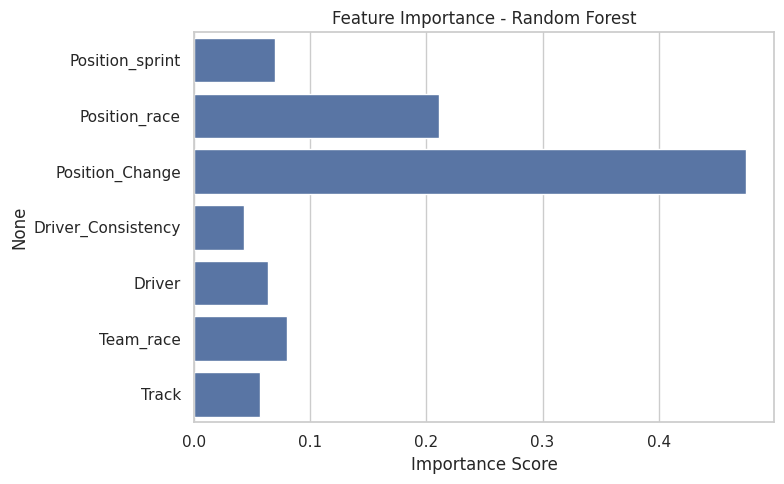

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance from the model
importances = model.feature_importances_
feature_names = X.columns

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


**Clustering Drivers (Unsupervised Learning)** : Cluster drivers based on consistency and qualifying/race performance:

In [58]:
from sklearn.cluster import KMeans

clustering_features = merged_df[['Position_Change', 'Driver_Consistency']]
clustering_features = clustering_features.fillna(0)

kmeans = KMeans(n_clusters=3, random_state=42)
merged_df['DriverCluster'] = kmeans.fit_predict(clustering_features)

# Visualize
fig = px.scatter(merged_df, x='Driver_Consistency', y='Position_Change',
                 color='DriverCluster', hover_name='Driver',
                 title='Driver Clustering by Consistency & Position Change')
fig.show()


In [65]:
import joblib

joblib.dump(model, 'f1_position_gain_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
model = joblib.load('f1_position_gain_model.pkl')


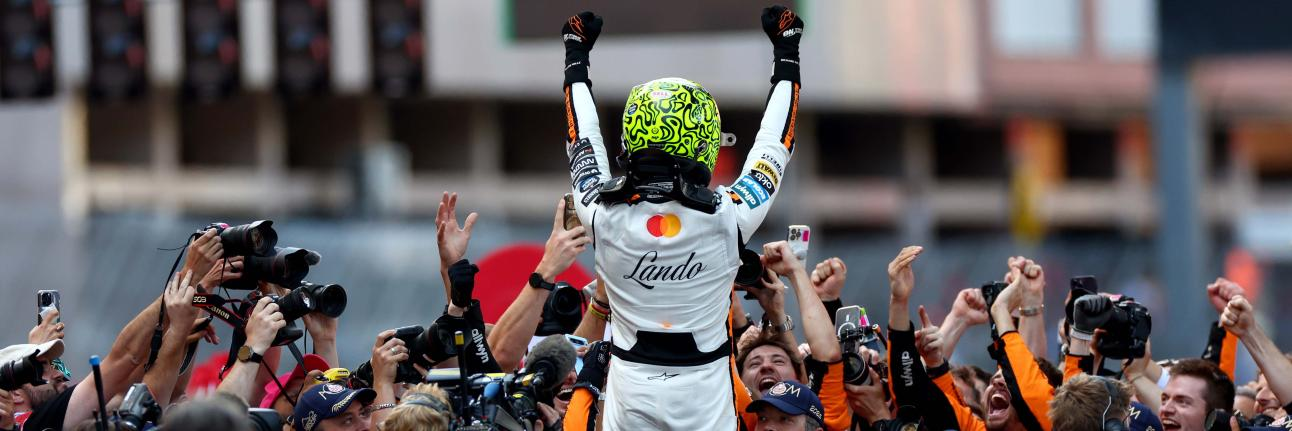

In [75]:
from IPython.display import Image, display

# Paste your copied URL inside the quotes
url = "https://www.google.com/search?q=f1+monaco+2025+winner+pic&sca_esv=b42e03ff43b61ad3&rlz=1C1GCEU_enPK1161PK1161&udm=2&biw=1280&bih=585&sxsrf=AE3TifOh1Vei8bgU01boU2Ol-r7DiEXJ1w%3A1748986992031&ei=cGw_aKjUAcWK7NYP482poAo&ved=0ahUKEwiozIGjnNaNAxVFBdsEHeNmCqQQ4dUDCBE&uact=5&oq=f1+monaco+2025+winner+pic&gs_lp=EgNpbWciGWYxIG1vbmFjbyAyMDI1IHdpbm5lciBwaWNIjiFQmQ1YuxtwAXgAkAEAmAHqAqAB9AmqAQUyLTIuMrgBA8gBAPgBAZgCAKACAJgDAIgGAZIHAKAHtAGyBwC4BwDCBwDIBwA&sclient=img#vhid=YYALmX-SbFh40M&vssid=mosaic"
display(Image(url=url))
from IPython.display import Image, display

display(Image("/content/F1 Results 2.jpg"))



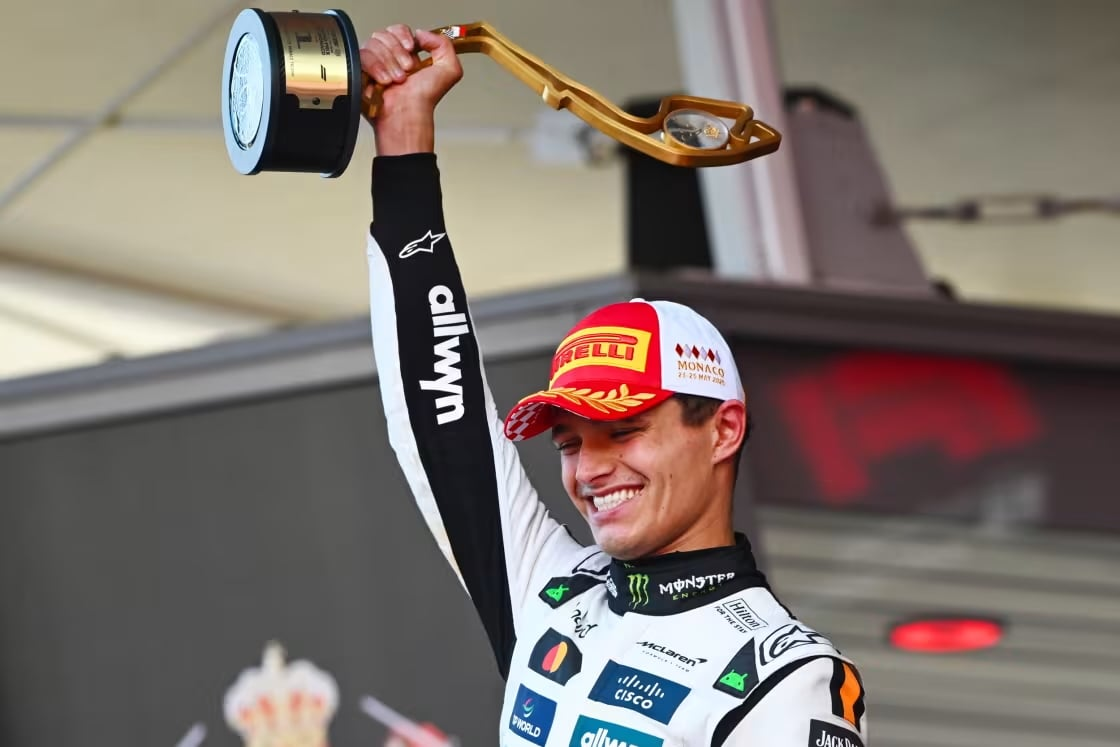

In [72]:
display(Image("/content/F1 Results 3.jpg"))


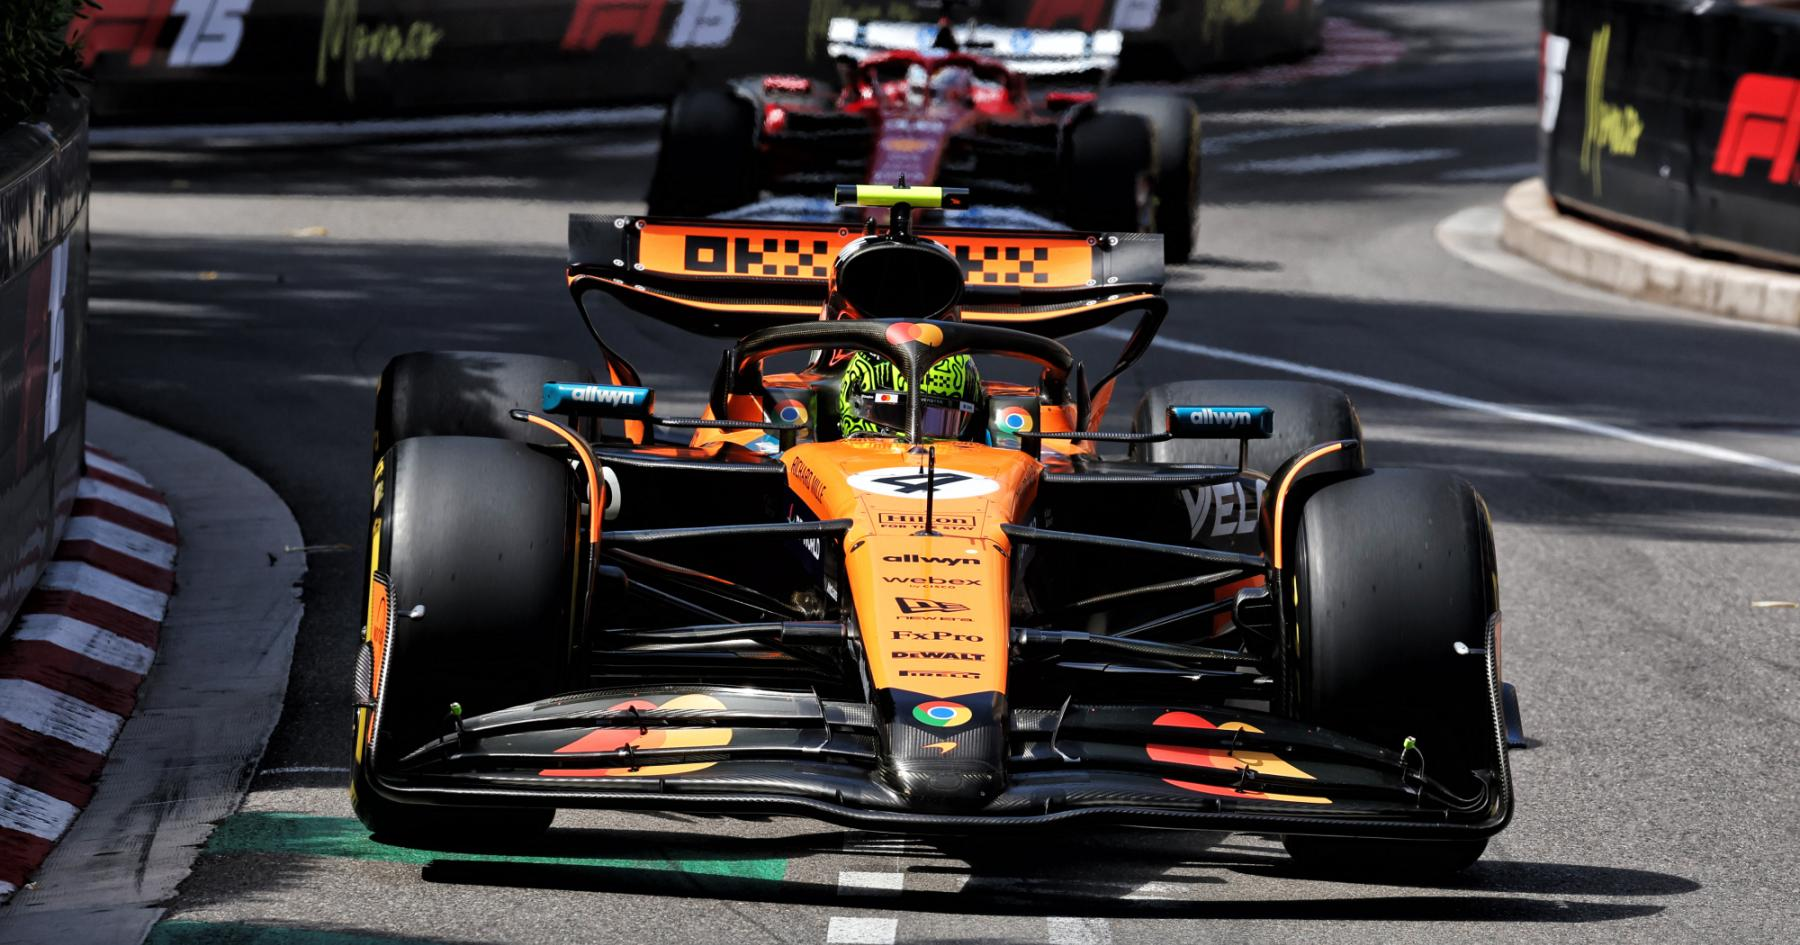

In [73]:
display(Image("/content/F1 Results 4.jpg"))


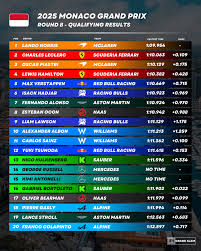

In [74]:
display(Image("/content/F1 Results 5.jpg"))


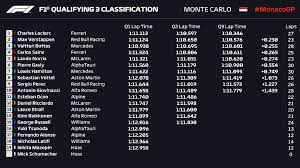

In [76]:
display(Image("/content/F1 Results 6.jpg"))
